# Evaluation & Plotting with Matplotlib in Python3

In [322]:
import os 
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from sklearn.gaussian_process import GaussianProcessRegressor
%matplotlib inline

# Import Measurements

In [2]:
def read_file(path):
    dataframe = pd.read_csv(path)
    #print(dataframe)
    return dataframe 

         X        Y   t_0  t_active
0        1  43.4889  58.0     471.0
1        2  43.1401   NaN       NaN
2        3  42.7669   NaN       NaN
3        4  42.8794   NaN       NaN
4        5  42.8611   NaN       NaN
...    ...      ...   ...       ...
1995  1996  47.4971   NaN       NaN
1996  1997  47.6067   NaN       NaN
1997  1998  47.7257   NaN       NaN
1998  1999  47.7445   NaN       NaN
1999  2000  47.4090   NaN       NaN

[2000 rows x 4 columns]


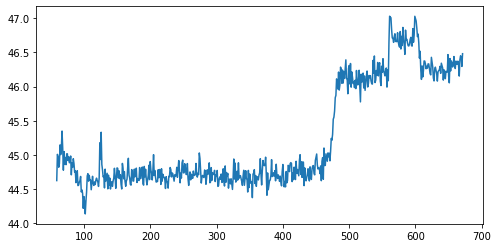

In [3]:
df = read_file('5kp/CD3/Values.csv')
print(df)
t_0 = df['t_0'][0]
t_active = df['t_active'][0]
plt.figure(figsize= (8,4))
plt.plot(df['X'][int(t_0):int(t_active)+200], df['Y'][int(t_0):int(t_active)+200])
plt.show()

In [4]:
print(os.listdir())

var = []
data = []

for folder in os.listdir():
    if os.path.isdir(folder) and 'ipynb' not in folder:
        #print(folder)
        data.append([folder])
        for varrient in os.listdir(folder):
            #print(folder,'\n', varrient)
            data[-1].append([varrient])
            if os.listdir(folder + '/' + varrient) != []:
                for subset in os.listdir(folder + '/' + varrient):
                    #print(folder + '/' + varrient + '/' + subset)
                    value = read_file(folder + '/' + varrient + '/' + subset)
                    data[-1][-1].append(value)
                    
                    
#print(data[2][2])      

['.ipynb_checkpoints', '100kp', '35kp', '5kp', 'Evaluation&Plots.ipynb', 'glass', 'Tracker.txt']


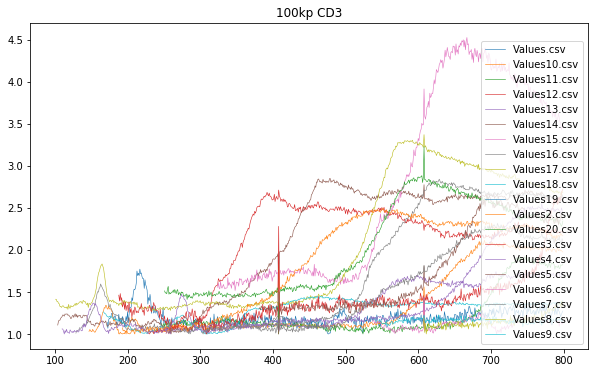

Δt Mean:  377.45
Activation Mean:  0.5019153047093651


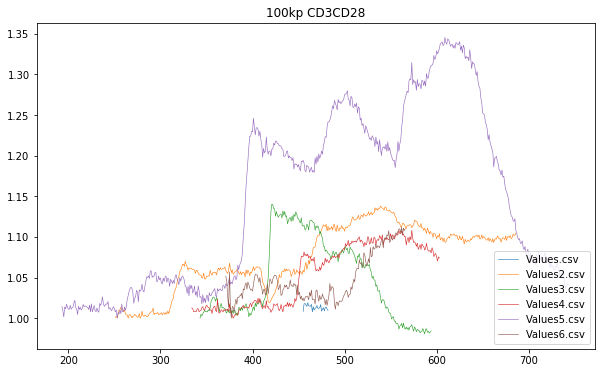

Δt Mean:  126.5
Activation Mean:  0.8769277254547704


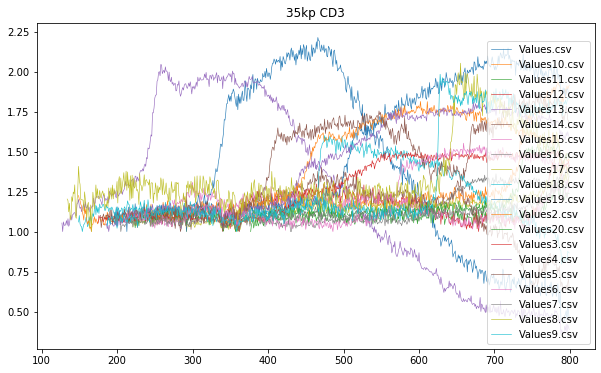

Δt Mean:  351.3
Activation Mean:  0.6706856359377066


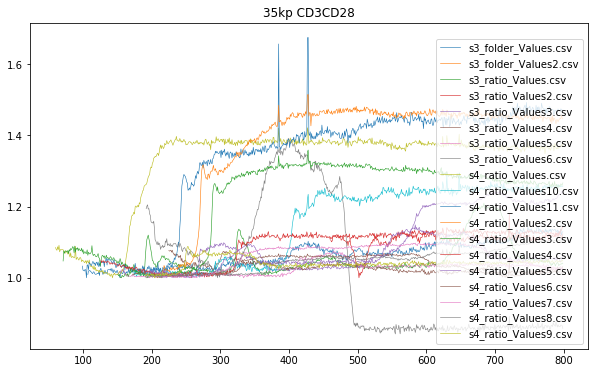

Δt Mean:  173.26315789473685
Activation Mean:  0.8831849519834165


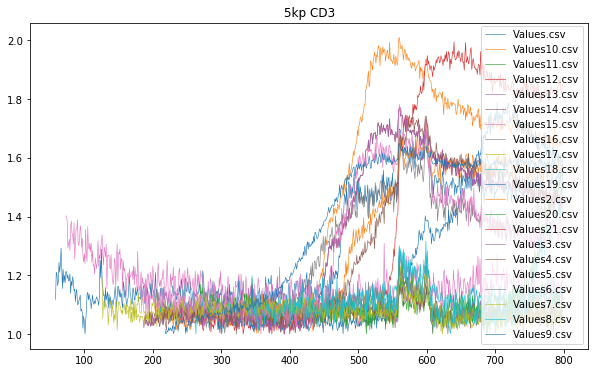

Δt Mean:  481.57142857142856
Activation Mean:  0.6520236384327468


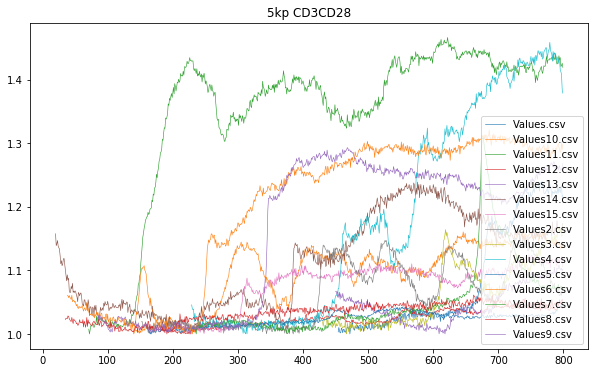

Δt Mean:  260.8
Activation Mean:  0.875261396598611


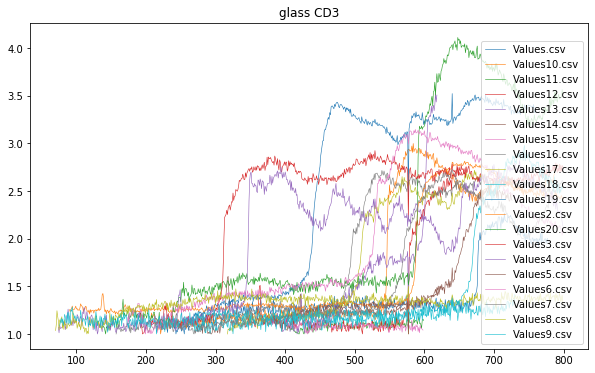

Δt Mean:  342.65
Activation Mean:  0.45622241932664337


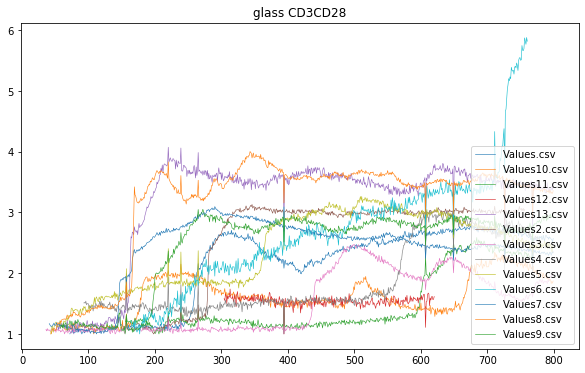

Δt Mean:  262.38461538461536
Activation Mean:  0.4404169587668473


In [94]:
Subs = []
boxplot_active = []
boxplot_time = []
box_label = []
for folder in os.listdir():
    if os.path.isdir(folder) and 'ipynb' not in folder:
        Subs.append(folder)
        
for substrate in Subs: 
    for cd in ['CD3', 'CD3CD28']:
        plt.figure(figsize = (10,6))
        delta_t = []
        activ = []
        for i in os.listdir(substrate +'/' + cd +'/'):
            #delta_t.append([])
            if 'csv' in i:
                value = read_file(substrate +'/' + cd + '/' + i)
                
                # Calculate timestamps
                t_0 = int(value['t_0'][0])
                t_active = int(value['t_active'][0])
                delta_t.append(int(t_active-t_0))

                output = False

                if output == True: 
                    print(i)
                    print('Min: ',min(value['Y']))
                    print('t_0:\t\t',t_0,'s','\nt_active:\t', t_active,'s')
                    print('\u0394 -t = \t\t',(t_active-t_0), 's\n')

    
                #Calculate Activation:
                mean_delta_t_intensity = statistics.mean(value['Y'][t_0:t_active])
                background = int(min(value['Y']))
                maximum_intensity_index  = int(statistics.median(value['X'][value['Y'] == max(value['Y'][t_active:t_active+200])]))
                #print(maximum_intensity_index)
                
                if len(value['Y'][maximum_intensity_index:maximum_intensity_index+60]) == 0:
                    mean_activation_intensity = value['Y'][maximum_intensity_index-1]
                else: 
                    mean_activation_intensity = statistics.mean(value['Y'][maximum_intensity_index:maximum_intensity_index+60])
                
                activation = (mean_delta_t_intensity-background)/(mean_activation_intensity-background)
                
                activ.append(activation)        

                # adjust range:
                x = []
                for j in range(t_0,len(value['Y'][t_0:t_0+800])):
                    x.append(j)

                #Norm Plot /start:
                y = []
                for j in range(int(t_0),len(value['Y'][t_0:t_0+800])):     
                    norm_y = (value['Y'][j]-background) / (min(value['Y'][int(t_0):int(t_active)])-background)
                    y.append(norm_y)



                plt.plot(x,y, label = i, linewidth = 0.6)
                #plt.plot(value['X'],value['Y'])
        plt.title(str(substrate) + ' ' + str(cd))
        plt.legend(loc = 4)        
        plt.show()
        print('\u0394t Mean: ', statistics.mean(delta_t))
        print('Activation Mean: ', statistics.mean(activ))
        boxplot_active.append(activ)
        boxplot_time.append(delta_t)
        box_label.append(str(substrate) + ' ' + str(cd))

# Statistics: 

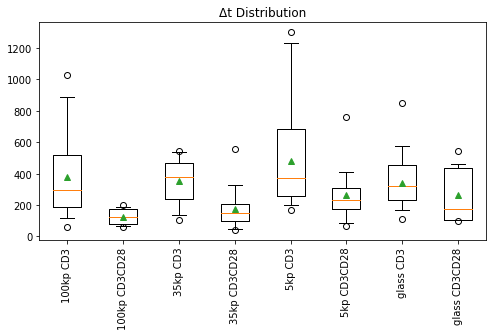

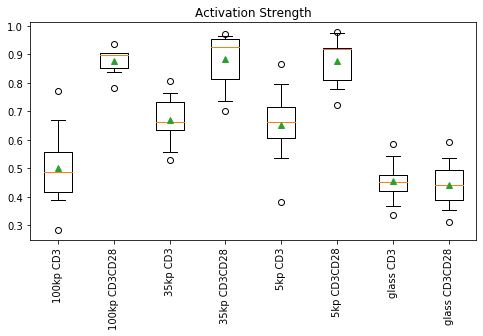

In [6]:
lab = []
for i in range(len(box_label)):
    lab.append(i+1)

# Delta t Plot
plt.figure(figsize= (8,4))
plt.title('\u0394t Distribution')
plt.boxplot(boxplot_time, showmeans = True, whis = [5,95])
plt.xticks(lab,box_label, rotation= 90)
plt.show()


# Activation Plot
plt.figure(figsize= (8,4))
plt.title('Activation Strength')
plt.boxplot(boxplot_active, showmeans = True, whis = [5,95])
plt.xticks(lab,box_label, rotation= 90)
plt.show()

T-Test comparison of each pair of CD3 and CD3CD28: 

In [108]:
stats.ttest_ind(boxplot_active[0],boxplot_active[4])

SyntaxError: invalid syntax (<ipython-input-108-c16d87c3f349>, line 1)

In [50]:
print('T-Test for CD3 & CD3CD28 Pairs')
for i in [0,2,4,6]:
    print(box_label[i][:-4],': \n',stats.ttest_ind(boxplot_active[i],boxplot_active[i+1]))
    

T-Test for CD3 & CD3CD28 Pairs
100kp : 
 Ttest_indResult(statistic=-7.636242826502188, pvalue=7.120115339441933e-08)
35kp : 
 Ttest_indResult(statistic=-8.115661683743918, pvalue=9.784044284151924e-10)
5kp : 
 Ttest_indResult(statistic=-7.064868282112372, pvalue=3.698590299805512e-08)
glass : 
 Ttest_indResult(statistic=0.6623274714675599, pvalue=0.5126556883225393)


In [ ]:
for i in label
    if 'CD3' in i[-4]:
        

In [25]:
from scipy import stats


norm_boxplot_time = []
for i in boxplot_time:
    norm_boxplot_time.append([])
    for j in i: 
        norm_boxplot_time[-1].append(int(j/max(i)))

print('KS-Test for \u0394t-Distribution \n')        
for i in range(len(boxplot_time)): 
    print(box_label[i],': \n',stats.kstest(norm_boxplot_time[i],'norm'))

print('\nKS-Test for Activation Strength \n')    
for i in range(len(boxplot_active)): 
    print(box_label[i],': \n',stats.kstest(boxplot_active[i],'norm'))


KS-Test for Δt-Distribution 

100kp CD3 : 
 KstestResult(statistic=0.5, pvalue=3.787595240539032e-05)
100kp CD3CD28 : 
 KstestResult(statistic=0.5, pvalue=0.06558641975308642)
35kp CD3 : 
 KstestResult(statistic=0.5, pvalue=3.787595240539032e-05)
35kp CD3CD28 : 
 KstestResult(statistic=0.5, pvalue=6.450178067945801e-05)
5kp CD3 : 
 KstestResult(statistic=0.5, pvalue=2.2241190852210096e-05)
5kp CD3CD28 : 
 KstestResult(statistic=0.5, pvalue=0.0005425700190728558)
glass CD3 : 
 KstestResult(statistic=0.5, pvalue=3.787595240539032e-05)
glass CD3CD28 : 
 KstestResult(statistic=0.5, pvalue=0.0015737985915988593)

KS-Test for Activation Strength 

100kp CD3 : 
 KstestResult(statistic=0.6117420000067153, pvalue=1.012656194623347e-07)
100kp CD3CD28 : 
 KstestResult(statistic=0.7825061663125984, pvalue=0.00021488081612548482)
35kp CD3 : 
 KstestResult(statistic=0.7019948211806373, pvalue=2.0505749636784e-10)
35kp CD3CD28 : 
 KstestResult(statistic=0.7582548628805907, pvalue=7.0528216898746506e-

# Further Plotting

43.2298
57.56873295454545 79.5655
0.7235388824873275


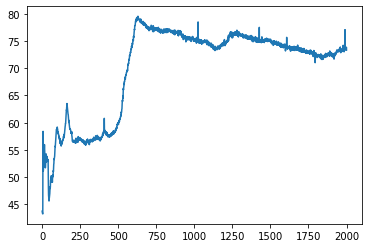

In [10]:
df = read_file('100kp/CD3/Values16.csv')
plt.plot(df['X'], df['Y'])
t_active = int(df['t_active'][0])
t_0 = int(df['t_0'][0])

print(min(df['Y']))
mean = statistics.mean(df['Y'][t_0:t_active])
print(mean, max(df['Y']))
print(mean/max(df['Y']))
#print(max(df['Y']), min(df['Y']))
plt.show()

In [347]:
mean_set = []
labels = []
for x in data:
    for Set in x[1:]:
        labels.append(str(x[0]+ Set[0]))
        print(x[0], '\t', Set[0],'n_values: ',len(Set)-1)
        y_es = []
        for subset in Set[1:]: 
            #print(len(subset['Y']))
            #print(x[0], subset)
            value = subset
            tmp_y = []
            t_0 = int(value['t_0'][0])
            t_active = int(value['t_active'][0])
            if t_0+800 <= len(value['Y']):
                if min(value['Y'][t_0:t_active]) != min(value['Y']):
                    for j in range(t_0, t_0+800):
                        norm_y = (value['Y'][j]-min(value['Y']))/ (min(value['Y'][t_0:t_active])-min(value['Y']))
                        tmp_y.append(norm_y)
                else: 
                    for j in range(t_0, t_0+800):
                        norm_y = (value['Y'][j]-min(value['Y']))/min(value['Y'])
                        tmp_y.append(norm_y)
            else: 
                if min(value['Y'][t_0:t_active]) != min(value['Y']):
                    for j in range(t_0, len(value['Y'])):
                        norm_y = (value['Y'][j]-min(value['Y']))/ (min(value['Y'][t_0:t_active])-min(value['Y']))
                        tmp_y.append(norm_y)
                else:
                    for j in range(t_0, t_0+800):
                        norm_y = (value['Y'][j]-min(value['Y']))/min(value['Y'])
                        tmp_y.append(norm_y)
            y_es.append(tmp_y)
        mean_set.append(y_es)
print(labels)

100kp 	 CD3 n_values:  20
100kp 	 CD3CD28 n_values:  6
35kp 	 CD3 n_values:  20
35kp 	 CD3CD28 n_values:  19
5kp 	 CD3 n_values:  21
5kp 	 CD3CD28 n_values:  15
glass 	 CD3 n_values:  20
glass 	 CD3CD28 n_values:  13
['100kpCD3', '100kpCD3CD28', '35kpCD3', '35kpCD3CD28', '5kpCD3', '5kpCD3CD28', 'glassCD3', 'glassCD3CD28']


100kpCD3


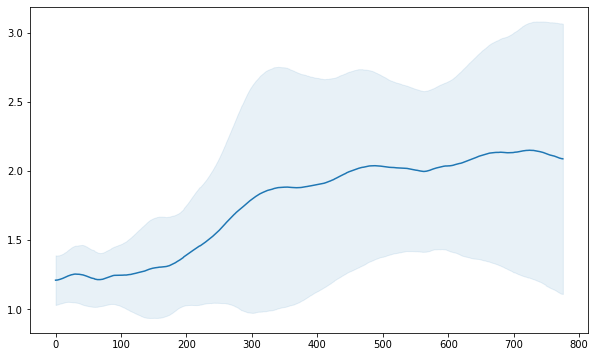

100kpCD3CD28


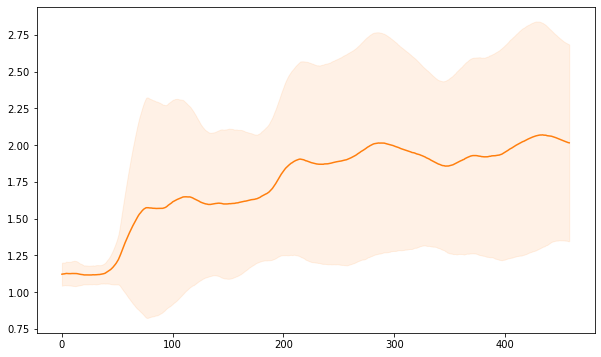

35kpCD3


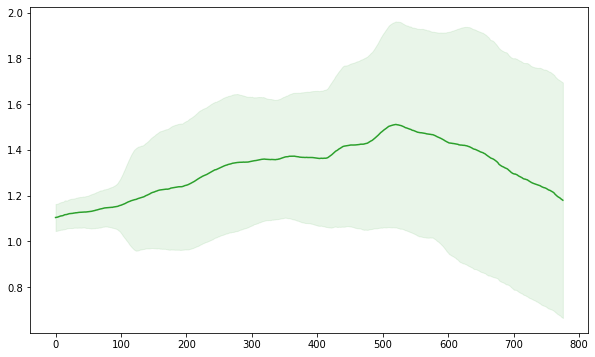

35kpCD3CD28


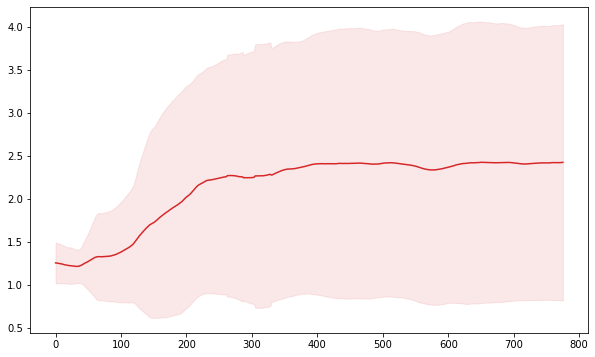

5kpCD3


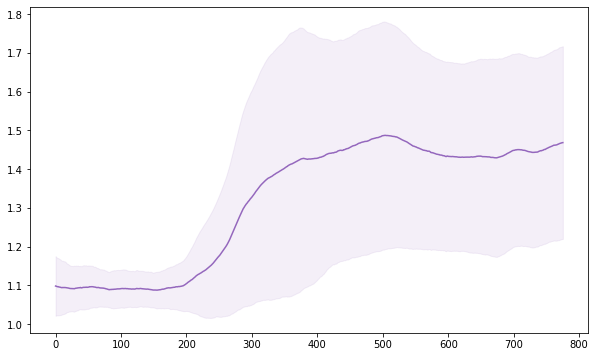

5kpCD3CD28


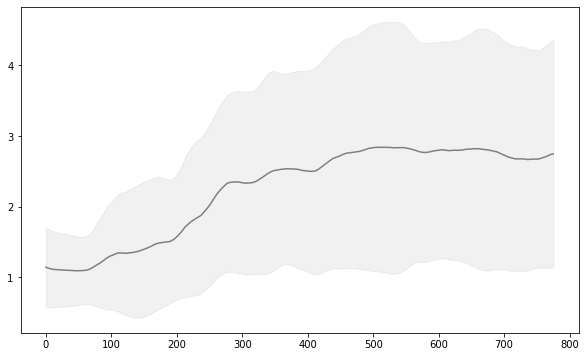

glassCD3


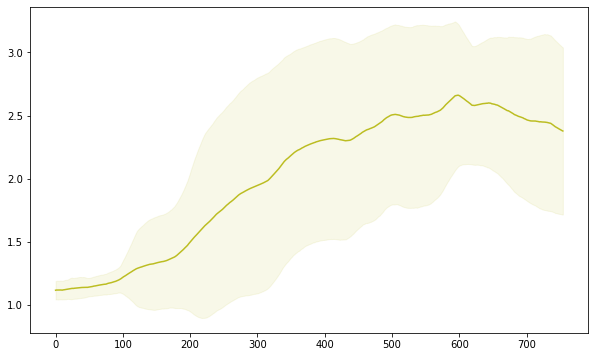

glassCD3CD28


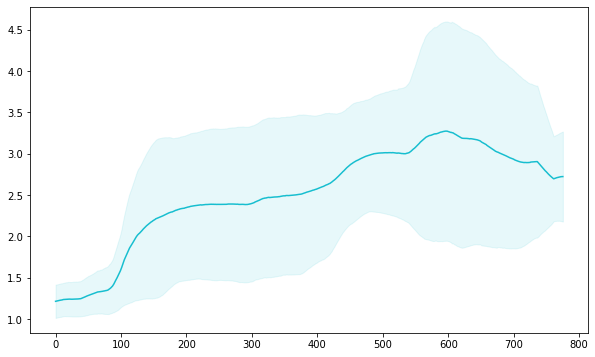

In [356]:
numpy.seterr(invalid='warn', divide = 'warn')
def mv_average(average):
    N = 25
    cumsum, moving_aves = [0], []

    for i, x in enumerate(average, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
    return moving_aves

colors= ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:gray', 'tab:olive','tab:cyan']

p = 0
#plt.figure(figsize= (10,6))
for Set in mean_set: 
    plt.figure(figsize= (10,6))
    average = [] 
    dev_set = [] 
    p = p +1
    #print(len(Set))
    
    for element in range(len(Set[0])):
        tmp = []
        for value in Set:
            if element in range(len(value)):
                tmp.append(value[element])
       
        dev_set.append(statistics.stdev(tmp))
        average.append(np.mean(tmp))    
        
    # Use filter & Errorband
    
    error = mv_average(dev_set)
    y = np.array(mv_average(average))
    t = [i for i in range(len(y))]
    
    y = y[:(np.shape(error)[0])]
    t = t[:(np.shape(error)[0])]
    #print(np.shape(t),np.shape(y),np.shape(error))
    
    
    print(labels[p-1])
    plt.plot(y,label = labels[p-1], color = colors[p-1])
    #plt.plot(error)
    plt.fill_between(t, y-error, y+error, color=colors[p-1], alpha=0.1)
    plt.show()
#plt.legend(loc = 'upper left')
#plt.show()